In [1]:
import numpy as np
import matplotlib.pyplot as plt

在本章中，我们将介绍 K-近邻算法（KNN），一种可以用于分类和回归任务的算法。KNN 简单的外表下隐藏着强大的功能和高可用性，它广泛运用于现实世界的各个领域，包括搜索系统和推荐系统。我们将对比 KNN 和简单线性回归模型，同时通过几个玩具问题来理解 KNN 模型。

# K-近邻模型

# 惰性学习和非参数模型
KNN 是一种**惰性学习模型**。惰性学习模型，也被称为基于实例的学习模型，会对训练数据集进行少量的处理或者完全不处理。和简单线性回归这样的勤奋学习模型不同，KNN在训练阶段不会估计由模型生成的参数。惰性学习有利有弊。训练勤奋学习模型通常很耗费计算资源，但是在模型预测阶段代价并不昂贵。例如在简单线性回归中，预测阶段只需要将特征乘以系数，再加上截断参数即可。惰性学习模型几乎可以进行即刻预测，但是需要付出高昂的代价。在 KNN 模型最简单的实现中，进行预测要求计算出一个测试实例和所有训练实例之间的距离。

和我们将要讨论的其他模型不同，KNN 是一种**非参数模型**。参数模型使用固定数量的参数或者系数去定义能够对数据进行总结的模型，参数的数量独立于训练实例的数量。非参数模型从字面上看似乎是个误称，因为它并不意味着模型不需要参数。相反，**非参数模型意味着模型的参数个数并不固定**，它可能随着训练实例数量的增加而增加。

当训练数据数量庞大，同时你对响应变量和解释变量之间的关系所知甚少时，非参数模型会非常有用。 **KNN 模型只基于一个假设：互相接近的实例拥有类似的响应变量值**。非参数模型提供的灵活性并不总是可取的，当训练数据很缺乏或者你对响应变量和解释变量之间的关系有所了解时，对响应变量和解释变量之间关系做假设的模型就很有用。

# KNN 模型分类

KNN 并不仅限于两个特征的情形，KNN 算法可以使用任意数量的特征，但是特征数量多于 3 时将无法进行可视化。

In [2]:
X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

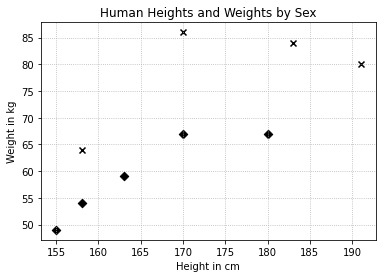

In [10]:
plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], 
                c='k', 
                marker='x' if y_train[i] == 'male' else 'D')
plt.grid(True, ls=':')
plt.show()


首先我们需要定义距离衡量方法，在此我们使用**欧几里得距离**，即在一个欧几里得空间中两点之间的直线距离。二维空间中的欧几里得距离计算如公式\ref{欧几里得距离}所示：

\begin{equation}\label{欧几里得距离}
d(p,q)=d(p,q)=\sqrt{(q_1-q_1)^2+(p_1-p_2)^2}
\end{equation}
接下来，我们需要计算测试实例和所有训练实例之间的距离。

In [14]:
x = np.array([[155, 70]])
distances = np.sqrt(np.sum((X_train-x)**2, axis=1))
print(distances)

[ 6.70820393 21.9317122  31.30495168 37.36308338 21.         13.60147051
 25.17935662 16.2788206  15.29705854]


我们设置参数 k 为 3，并选取 3 个距离最近的训练实例。计算出测试实例和所有训练实例之间的距离，并找出距离最近的邻居中**最普遍**的性别。

In [33]:
nearest_neighbor_indices = distances.argsort()[:3]    # 升序排序后，返回索引值
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
print(nearest_neighbor_genders)

['male' 'female' 'female']


In [35]:
from collections import Counter
# 将各类进行计数
b = Counter(np.take(y_train, distances.argsort()[:3]))
# 找到近邻最多的类型，返回类型和数量，使用[0][0]获取类型
b.most_common(1)[0][0]

'female'

现在使用 scikit-learn 类库实现一个 KNN 分类器。